In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
#Load and clean data
data = pd.read_csv('nyc_airbnb_rentals_final.csv', delimiter = '|')  # load data set
Y = data["price"]
X0 = data[["beds", "bedrooms","accommodates", "review_scores_rating", "review_scores_accuracy",
              "review_scores_cleanliness",	"review_scores_checkin","review_scores_communication","review_scores_location",	"review_scores_value",
              "number_of_reviews", "neighbourhood_group_cleansed", "room_type"]]
# if none, neighbourhood group is bronx
# if none, room type is entire home/apt
X = pd.get_dummies(X0, columns=["neighbourhood_group_cleansed", "room_type"])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)


LinearRegression()

In [ ]:
print(linear_regressor.intercept_)
print(linear_regressor.coef_) #weight of each input
list(zip(X.columns, linear_regressor.coef_))


-14.003111878896505
[-2.35252745e-01  2.99932315e+01  2.42584986e+01  5.86055339e+00
 -1.11277499e+01  2.65679876e+01 -7.06253239e+00 -4.49511979e+00
  2.87457658e+01 -1.70944118e+01 -1.19759441e-01 -1.46164252e+01
  1.63043062e+00  5.82490221e+01 -1.57361740e+01 -2.95268535e+01
 -4.12694741e+01  2.10232043e+02 -8.00036478e+01 -8.89589216e+01]


[('beds', -0.23525274466106602),
 ('bedrooms', 29.993231452701707),
 ('accommodates', 24.25849855135797),
 ('review_scores_rating', 5.8605533933970335),
 ('review_scores_accuracy', -11.127749926578018),
 ('review_scores_cleanliness', 26.567987619104443),
 ('review_scores_checkin', -7.062532387737947),
 ('review_scores_communication', -4.495119792851293),
 ('review_scores_location', 28.74576583218177),
 ('review_scores_value', -17.09441176410809),
 ('number_of_reviews', -0.11975944129322037),
 ('neighbourhood_group_cleansed_Bronx', -14.61642519902987),
 ('neighbourhood_group_cleansed_Brooklyn', 1.6304306199477419),
 ('neighbourhood_group_cleansed_Manhattan', 58.249022095615736),
 ('neighbourhood_group_cleansed_Queens', -15.736174038506341),
 ('neighbourhood_group_cleansed_Staten Island', -29.526853478026926),
 ('room_type_Entire home/apt', -41.269474072964115),
 ('room_type_Hotel room', 210.2320434646581),
 ('room_type_Private room', -80.00364778058488),
 ('room_type_Shared room', -88.9

In [ ]:
feature_importance = pd.DataFrame(list(zip(X.columns, linear_regressor.coef_)))

feature_importance.columns=['feature', 'coefficient']

feature_importance.sort_values(by="coefficient", ascending=False)


,feature,coefficient
17,room_type_Hotel room,210.232043
13,neighbourhood_group_cleansed_Manhattan,58.249022
1,bedrooms,29.993231
8,review_scores_location,28.745766
5,review_scores_cleanliness,26.567988
2,accommodates,24.258499
3,review_scores_rating,5.860553
12,neighbourhood_group_cleansed_Brooklyn,1.630431
10,number_of_reviews,-0.119759
0,beds,-0.235253


In [ ]:
Y_pred = linear_regressor.predict(X_test)

In [ ]:
data['room_type'].value_counts()

Entire home/apt    20127
Private room       16990
Shared room          560
Hotel room           168
Name: room_type, dtype: int64

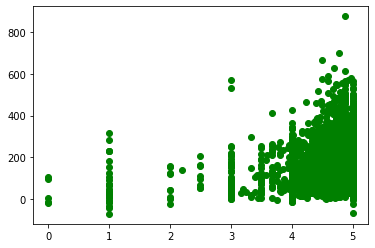

In [ ]:
import R as sns

import matplotlib.pyplot as plt

#plt.scatter(X_test['review_scores_location'], Y_pred, color="green")
plt.scatter(X_test['review_scores_location'], Y_pred, color="green")


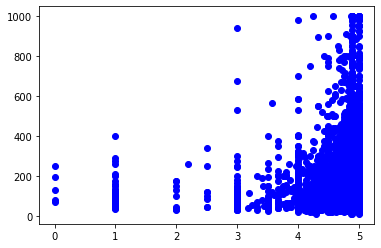

In [ ]:
plt.scatter(X_test['review_scores_location'], Y_test, color="blue")

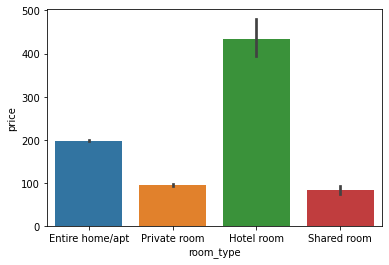

In [ ]:
room_type_pd=data.groupby('room_type')['price'].mean().reset_index()
room_type_pd

sns.barplot(data=data, x="room_type", y="price")

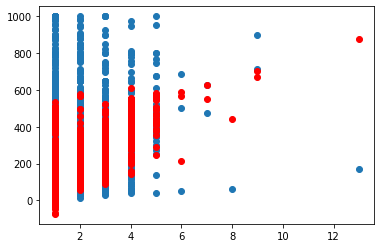

In [ ]:
pd_result=pd.concat([X_test, Y_test], axis=1)

pd_result['Y_pred']=Y_pred

plt.scatter(pd_result['bedrooms'], pd_result['price'])

plt.scatter(pd_result['bedrooms'], pd_result['Y_pred'], color="red")


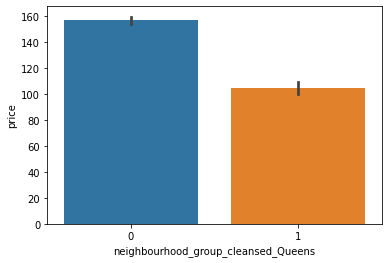

In [ ]:


sns.barplot(data=pd_result, x="neighbourhood_group_cleansed_Queens", y="price")

In [ ]:
pd_result.columns

Index([                                      'beds',
                                         'bedrooms',
                                     'accommodates',
                             'review_scores_rating',
                           'review_scores_accuracy',
                        'review_scores_cleanliness',
                            'review_scores_checkin',
                      'review_scores_communication',
                           'review_scores_location',
                              'review_scores_value',
                                'number_of_reviews',
            'neighbourhood_group_cleansed_Brooklyn',
           'neighbourhood_group_cleansed_Manhattan',
              'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island',
                             'room_type_Hotel room',
                           'room_type_Private room',
                            'room_type_Shared room',
                                              

In [ ]:
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print(r2_score(Y_test, Y_pred))

62.66084065219965
10407.115865554933
102.01527270734972
0.37350598827526404


In [ ]:
data = pd.read_csv('nyc_airbnb_rentals_final.csv', delimiter = '|')  # load data set
#data['amenities'].apply(pd.Series)
#data.describe()
pd.options.display.max_colwidth = 150
data.iloc[:,25:40]


,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,1125,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0.33,150.0
1,730,409,32,0,4.45,4.58,4.49,4.78,4.80,4.71,4.64,4.86,75.0
2,730,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0.52,60.0
3,1125,2,1,0,5.00,5.00,5.00,5.00,5.00,4.50,5.00,0.02,275.0
4,14,507,33,2,4.21,4.21,3.73,4.66,4.42,4.87,4.36,3.68,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37840,1125,0,0,0,4.82,4.90,4.80,4.96,4.97,4.88,4.78,0.48,79.0
37841,1125,0,0,0,4.82,4.90,4.80,4.96,4.97,4.88,4.78,0.48,76.0
37842,1125,0,0,0,4.82,4.90,4.80,4.96,4.97,4.88,4.78,0.48,116.0
37843,1125,0,0,0,4.82,4.90,4.80,4.96,4.97,4.88,4.78,0.48,106.0
